In [3]:
# pip install matplotlib

  Using cached matplotlib-3.5.1-cp39-cp39-macosx_10_9_x86_64.whl (7.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 KB 343.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.5/899.5 KB 417.7 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 426.3 kB/s eta 0:00:0000:0100:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

### Batch 1

- corpus: Hamlet
- model: ada
- number of training pairs: 1000
- epochs: 4
- batch_size: 2
- learning_rate: unknown (0.5, 0.1 or 0.2)

In [25]:
batch1 = pd.read_csv('../data/results/batch1_results.csv', skiprows=[0])
batch1

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy
0,1,17,1,4.153420,0.0,0.133333
1,2,34,2,3.373249,0.0,0.250000
2,3,43,3,5.557220,0.0,0.000000
3,4,60,4,3.011040,0.0,0.300000
4,5,77,5,3.789927,0.0,0.090909
...,...,...,...,...,...,...
3965,3966,58630,3966,0.840079,0.0,0.888889
3966,3967,58639,3967,0.740880,0.0,0.857143
3967,3968,58656,3968,0.270415,0.0,0.888889
3968,3969,58673,3969,0.851558,0.0,0.750000


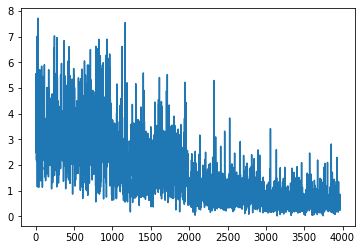

In [23]:
plt.plot(batch1["training_loss"], label="train_loss")
plt.show()

### Batch 2

- corpus: MacBeth + Hamlet
- model: ada
- number of training pairs: 4000
- number of validation pairs: 1000
- epochs: 10
- batch_size: 80 - 50 batches
- learning_rate: 0.1

50 batches (80 * 50 = 4000)

10 epochs

every 50 step is 1 epoch. 10 epochs = 500 steps

In [105]:
def format_df(df, n_training_pairs, batch_size, validation_set=True):
    if validation_set:
        df = df[["training_loss", "validation_loss"]]
    else:
        df = df[["training_loss"]]
    step = round(n_training_pairs / batch_size) # if step = 50, 1 epoch will be completed every 50 steps.
    plot_df = df.iloc[::step]
    plot_df = plot_df.reset_index(drop=True)
    plot_df = plot_df.rename_axis('epoch').reset_index()

    return plot_df

def plot_losses(formatted_df, validation_set=True):
    plt.plot(formatted_df["training_loss"], label="train_loss")
    if validation_set:
        plt.plot(formatted_df["validation_loss"], label="val_loss")
    plt.legend()
    plt.title("Losses")
    plt.show()

In [106]:
batch2 = pd.read_csv('../data/results/batch2_results.csv', skiprows=[0])
batch2

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy,validation_loss,validation_sequence_accuracy,validation_token_accuracy
0,1,2000,80,2.154347,0.0000,0.243874,2.059457,0.0,0.243932
1,2,4000,160,2.139267,0.0000,0.245940,NaN,NaN,NaN
2,3,6640,240,1.672167,0.0000,0.226177,NaN,NaN,NaN
3,4,9280,320,1.534726,0.0000,0.231780,NaN,NaN,NaN
4,5,11280,400,2.030234,0.0000,0.250000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
497,498,1071520,39840,0.172552,0.1625,0.892216,2.782769,0.0,0.302998
498,499,1073520,39920,0.180267,0.1625,0.893939,NaN,NaN,NaN
499,500,1076160,40000,0.144772,0.1125,0.889160,NaN,NaN,NaN
500,501,1078160,40080,0.180901,0.1500,0.901775,NaN,NaN,NaN


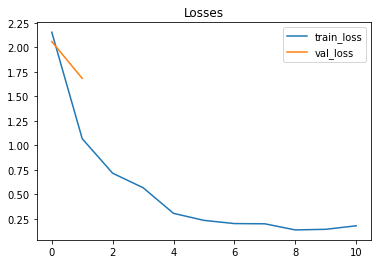

In [107]:
batch2 = format_df(batch2, 4000, 80)
batch2_plot = plot_losses(batch2)